In [1]:
''' 
 Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering
 Date; 10. 11. 2021 - 11. 13. 2021
 Title: Artificial Intelligence_Project 2
 Professor: Seung-Hoon Na
 Reference: https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html'''

' \n Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering\n Date; 10. 11. 2021 - 11. 13. 2021\n Title: Artificial Intelligence_Project 2\n Professor: Seung-Hoon Na\n Reference: https://cpm0722.github.io/pytorch-implementation/transformer\n            https://pytorch.org/tutorials/beginner/transformer_tutorial.html'

In [24]:
from __future__ import unicode_literals, print_function, division # 'from __future__ ': work python2.x code like python 3.x

from io import open
import glob
import os


def findFiles(path):
    return glob.glob(path) # glob.glob: Return a possibly-empty list of path names that match pathname, which must be a string containing a path specification

print(findFiles(r"C:\Users\LG\Desktop\JBNU_ISE\GITHUB\JBNU-2021-Summer\Pytorch tutorial\Text\data\data\names\*.txt"))

['C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Arabic.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Chinese.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Czech.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Dutch.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\English.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\French.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\German.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Greek.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pyt

In [47]:
import unicodedata # provides access to the Unicode Character Database (UCD) which defines character properties for all Unicode characters
import string

all_letters = string.ascii_letters + ".,;''" # string.ascii: The concatenation of the 'ascii_lowercase' and 'ascii_uppercase' constants described below. This value is not locale-dependent.
n_letters = len(all_letters)
print('all_letters:', all_letters)
print('n_letters:', n_letters)

all_letters: abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;''
n_letters: 57


# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427

In [26]:
def unicodeToAscii(s):
# join: ['a', 'b', 'c'] -> 'abc'
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) # unicodedata.normalize: Return the normal form form for the Unicode string unistr. Valid values for form are ‘NFC’, ‘NFKC’, ‘NFD’, and ‘NFKD’.
        if unicodedata.category(c) != 'Mn' # Returns the general category assigned to the character chr as string.
        and c in all_letters)
print(unicodeToAscii('Ślusàrski'))

Slusarski


# Build the category_lines dictionary, a list of names per language

In [35]:
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding = 'utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles(r"C:\Users\LG\Desktop\JBNU_ISE\GITHUB\JBNU-2021-Summer\Pytorch tutorial\Text\data\data\names\*.txt"):
    category = os.path.splitext(os.path.basename(filename))[0] # os.path.basename: Return the base name of pathname path
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
    
n_categories = len(all_categories)

print(category_lines['Italian'][:3])
print(all_categories)

['Abandonato', 'Abatangelo', 'Abatantuono']
['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']


# Turning Names into Tensors

In [72]:
import torch

# Find letter index from all_letters ex) "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)
print('J:', letterToIndex('J'))

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1 
    return tensor

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
        
    return tensor

print(letterToTensor("J"))
print(lineToTensor('Jones').size())
print(lineToTensor('Jones').size()[0])
print(lineToTensor('Jones'))

J: 35
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])
5
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

# Creating the Network
- Before autograd, creating a recurrent neural network in Torch involved cloning the parameters of a layer over several timesteps
- RNN module: just 2 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output.

In [57]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim = 1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

'''
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
'''

# For the sake of efficiency we don’t want to be creating a new Tensor for every step, so we will use lineToTensor instead of letterToTensor and use slices. 
#This could be further optimized by pre-computing batches of Tensors.
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8976, -2.8895, -2.8750, -2.8039, -2.8683, -2.7978, -2.9871, -2.8966,
         -2.8247, -2.9102, -2.8725, -2.9762, -2.9450, -2.8855, -2.8571, -2.8568,
         -2.9636, -2.9456]], grad_fn=<LogSoftmaxBackward>)


# Training

# MAKE helper functions 
- to interpret the output of the network, which we know to be a likelihood of each category

In [64]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) #Tensor.topk:  to get the index of the greatest value
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('French', 5)


# A quick way to get a training example (a name and its language)

In [67]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype = torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/line =',line)

category = Japanese /line = Okui
category = Dutch /line = Sneijders
category = Dutch /line = Sniders
category = Irish /line = Sheehy
category = Russian /line = Grizodubov
category = Chinese /line = Hong
category = Dutch /line = Houte
category = French /line = Severin
category = Chinese /line = Xiao
category = English /line = Blackwell


# Training the Network

In [69]:
criterion = nn.NLLLoss()

In [ ]:
'''
Each loop of training will:

 Create input and target tensors
 Create a zeroed initial hidden state
 Read each letter in and
    Keep hidden state for next letter
 Compare final output to target
 Back-propagate
 Return the output and loss
'''

In [70]:
learning_rate = 0.005 # you need to pick moderate one.

In [91]:
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    loss.backward()
    
    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
        '''
        a = torch.tensor([[1,1],[1,1]])
        b = torch.tensor(2)
        c = torch.tensor(3)
        a.add_(b,c)
        print(a)
        -> tensor([[7, 7],
                  [7, 7]])
        '''
        return output, loss.item()

In [79]:
for p in rnn.named_parameters():
        print(p)

('i2h.weight', Parameter containing:
tensor([[ 0.0014,  0.0304,  0.0462,  ..., -0.0487, -0.0472,  0.0013],
        [ 0.0558, -0.0030, -0.0582,  ..., -0.0026, -0.0121, -0.0316],
        [-0.0625,  0.0412, -0.0368,  ...,  0.0209, -0.0469, -0.0243],
        ...,
        [-0.0679, -0.0152,  0.0136,  ...,  0.0702, -0.0354,  0.0115],
        [ 0.0248,  0.0729,  0.0704,  ...,  0.0715,  0.0008, -0.0466],
        [ 0.0204,  0.0493, -0.0137,  ..., -0.0726,  0.0026,  0.0475]],
       requires_grad=True))
('i2h.bias', Parameter containing:
tensor([-4.2084e-02,  7.0795e-02,  2.0870e-02, -1.7269e-02, -2.0689e-02,
         5.8767e-02, -3.8202e-02, -5.5919e-02, -6.2633e-03,  3.7179e-02,
        -3.0209e-02,  6.2773e-02,  2.3029e-02,  1.2049e-02, -3.5972e-02,
         3.9118e-02, -7.2921e-04, -1.2361e-02, -3.7863e-02, -5.8283e-02,
        -3.9429e-02, -1.0385e-02, -3.4742e-02, -3.0104e-02,  5.4405e-02,
        -5.1978e-02, -3.9186e-02, -3.4802e-02,  1.2278e-02, -6.6084e-03,
        -2.3152e-02, -2.0246

# Run that with a bunch of examples

In [108]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Kepp track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60) # math.floor: return less than or equal to a specified number
    s -= m * 60
    return '%dm %ds' % (m,s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        '''
        if guess == category:
            correct = '✓'
        else: 'X (%s)' % category
        '''
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
        
    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 8s) 1.5840 Fukuyama / Arabic X (Italian)
10000 10% (0m 17s) 0.9405 Luong / Vietnamese ✓
15000 15% (0m 25s) 2.5788 Mackay / Greek ✓
20000 20% (0m 33s) 1.2703 Yong / Korean ✓
25000 25% (0m 42s) 2.8235 Auttenberg / Greek ✓
30000 30% (0m 51s) 2.3568 Fonseca / French ✓
35000 35% (0m 59s) 2.3594 Antonowitsch / Greek ✓
40000 40% (1m 7s) 0.8022 Wronski / Polish ✓
45000 45% (1m 16s) 2.5120 Vipond / Italian ✓
50000 50% (1m 24s) 2.7486 Nizzola / Japanese ✓
55000 55% (1m 33s) 1.4084 Seok / Korean ✓
60000 60% (1m 42s) 1.8385 Khu / Korean ✓
65000 65% (1m 51s) 2.4155 Soho / Korean ✓
70000 70% (2m 0s) 0.5845 Ayabito / Japanese ✓
75000 75% (2m 9s) 1.0315 Naser / Arabic ✓
80000 80% (2m 17s) 0.9680 Choi / Korean ✓
85000 85% (2m 26s) 1.2767 Mar / Chinese ✓
90000 90% (2m 35s) 2.0389 Teague / Irish ✓
95000 95% (2m 44s) nan Leeuwenhoek / Arabic ✓
100000 100% (2m 52s) nan Kennedy / Arabic ✓


# Plotting the Results

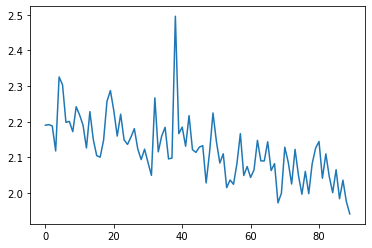

In [109]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

# Evaluating the Results

In [ ]:
# keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    
    for i in range(line_tensor.size()[0]):
    
    